<h3>Import the necessary libraries</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>Read the excel file</h3>

In [2]:
df = pd.read_excel("C:/Users/ADMIN/Call Volume Trend Analysis/Call_Volume_Trend_Analysis.xlsx")
df.head()  # returns first 5 rows

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,2022-01-01 09:02:38,9,9_10,00:01:36,96,answered,Agent,YES,00:00:16
1,Executives 4,1000004.0,80595XXXXX,0,2022-01-01 09:02:40,9,9_10,00:02:20,140,answered,Agent,YES,00:00:26
2,Executives 65,1000065.0,70202XXXXX,0,2022-01-01 09:02:49,9,9_10,00:01:25,85,answered,AutoWrapped,YES,00:00:16
3,Executives 55,1000055.0,96104XXXXX,1,2022-01-01 09:02:51,9,9_10,00:01:31,91,answered,Agent,YES,00:00:25
4,Executives 21,1000021.0,82001XXXXX,0,2022-01-01 09:02:55,9,9_10,00:02:45,165,answered,Agent,YES,00:00:23


In [3]:
df.shape  # returns the total number of rows and columns

(117988, 13)

In [4]:
df.info()  # provides information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117988 entries, 0 to 117987
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Agent_Name          83790 non-null   object        
 1   Agent_ID            83790 non-null   float64       
 2   Customer_Phone_No   117988 non-null  object        
 3   Queue_Time(Secs)    117988 non-null  int64         
 4   Date_&_Time         117988 non-null  datetime64[ns]
 5   Time                117988 non-null  int64         
 6   Time_Bucket         117988 non-null  object        
 7   Duration(hh:mm:ss)  117988 non-null  object        
 8   Call_Seconds (s)    117988 non-null  int64         
 9   Call_Status         117988 non-null  object        
 10  Wrapped _By         70111 non-null   object        
 11  Ringing             117988 non-null  object        
 12  IVR _Duration       117988 non-null  object        
dtypes: datetime64[ns](1), float64

In [5]:
df.duplicated().sum()   # checks for total number of duplicate rows

0

In [6]:
df.describe().T  # provides descriptive statistics

,count,mean,min,25%,50%,75%,max,std
Agent_ID,83790.0,1000033.828607,1000001.0,1000019.0,1000034.0,1000050.0,1000065.0,18.206546
Queue_Time(Secs),117988.0,52.168051,0.0,8.0,40.0,103.0,122.0,46.154871
Date_&_Time,117988,2022-01-13 01:19:25.655702272,2022-01-01 09:02:38,2022-01-07 12:16:48.249999872,2022-01-13 19:29:49,2022-01-17 15:11:05.500000,2022-01-23 20:59:12,NaN
Time,117988.0,13.701792,9.0,11.0,13.0,16.0,21.0,3.234274
Call_Seconds (s),117988.0,139.532147,0.0,0.0,115.0,202.25,3872.0,158.51245


In [7]:
df.describe(include='object').T  # provides descriptive statistics for object data type

,count,unique,top,freq
Agent_Name,83790,65,Executives 59,2403
Customer_Phone_No,117988,17107,80774XXXXX,77
Time_Bucket,117988,12,11_12,14626
Duration(hh:mm:ss),117988,1230,00:00:00,34512
Call_Status,117988,3,answered,82452
Wrapped _By,70111,2,Agent,60396
Ringing,117988,1,YES,117988
IVR _Duration,117988,174,00:00:16,12419


<h3>Data cleaning and preprocessing</h3>

In [8]:
df.isnull().sum()  # returns the total number of null rows for each column

Agent_Name            34198
Agent_ID              34198
Customer_Phone_No         0
Queue_Time(Secs)          0
Date_&_Time               0
Time                      0
Time_Bucket               0
Duration(hh:mm:ss)        0
Call_Seconds (s)          0
Call_Status               0
Wrapped _By           47877
Ringing                   0
IVR _Duration             0
dtype: int64

In [9]:
# Since Agent_Name is a categorical column, we fill the missing values with the column mode
agent_name_mode = df['Agent_Name'].mode()[0]  # returns the first mode value
df['Agent_Name'] = df['Agent_Name'].fillna(agent_name_mode)  # fills the null values with calculated mode
df.isnull().sum()

Agent_Name                0
Agent_ID              34198
Customer_Phone_No         0
Queue_Time(Secs)          0
Date_&_Time               0
Time                      0
Time_Bucket               0
Duration(hh:mm:ss)        0
Call_Seconds (s)          0
Call_Status               0
Wrapped _By           47877
Ringing                   0
IVR _Duration             0
dtype: int64

In [10]:
wrapped_by_mode = df['Wrapped _By'].mode()[0]
df['Wrapped _By'] = df['Wrapped _By'].fillna(wrapped_by_mode)
df.isnull().sum()

Agent_Name                0
Agent_ID              34198
Customer_Phone_No         0
Queue_Time(Secs)          0
Date_&_Time               0
Time                      0
Time_Bucket               0
Duration(hh:mm:ss)        0
Call_Seconds (s)          0
Call_Status               0
Wrapped _By               0
Ringing                   0
IVR _Duration             0
dtype: int64

In [11]:
# We fill the missing values in Agent_ID with its column median
agent_id_median = df['Agent_ID'].median()
df['Agent_ID'] = df['Agent_ID'].fillna(agent_id_median)
df.isnull().sum()

Agent_Name            0
Agent_ID              0
Customer_Phone_No     0
Queue_Time(Secs)      0
Date_&_Time           0
Time                  0
Time_Bucket           0
Duration(hh:mm:ss)    0
Call_Seconds (s)      0
Call_Status           0
Wrapped _By           0
Ringing               0
IVR _Duration         0
dtype: int64

<h3>For checking the distribution of data, we are using histogram</h3>

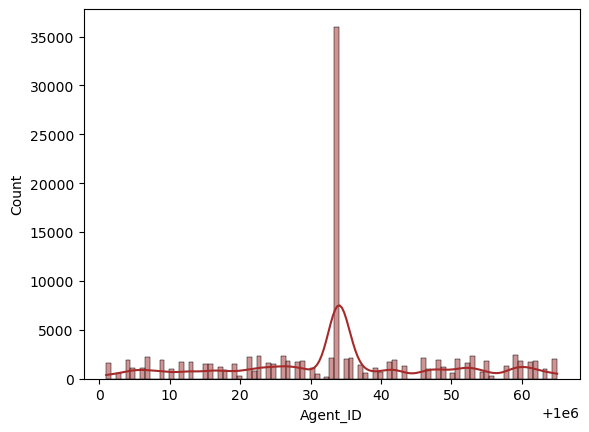

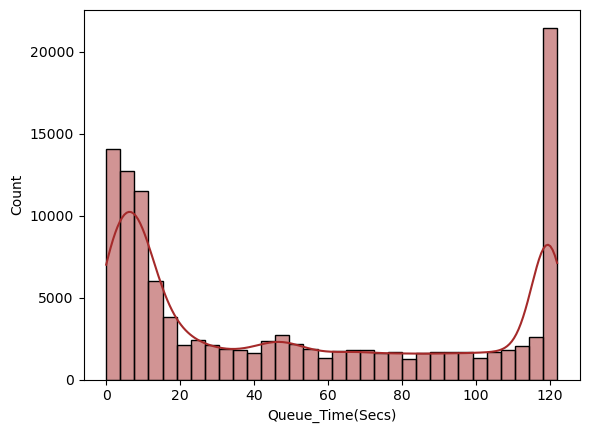

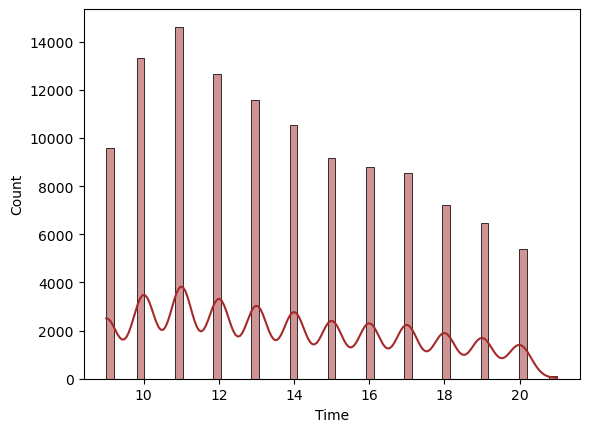

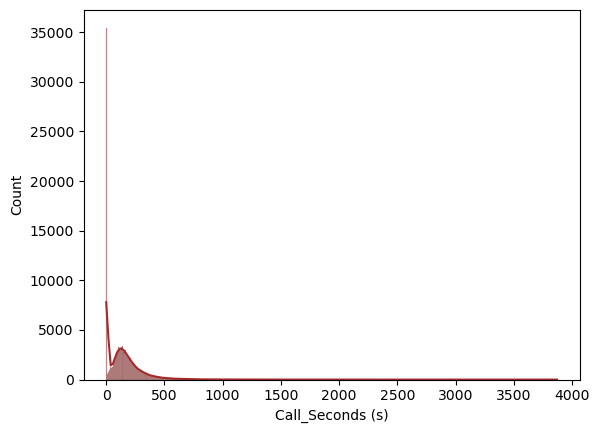

In [12]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i,kde=True,color='brown')
    plt.show()

<h3>For checking outliers, we are using box plots</h3>

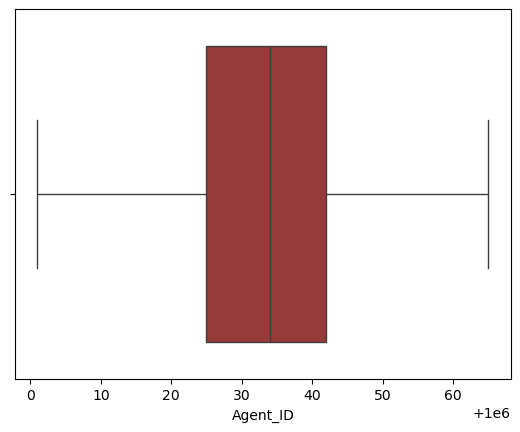

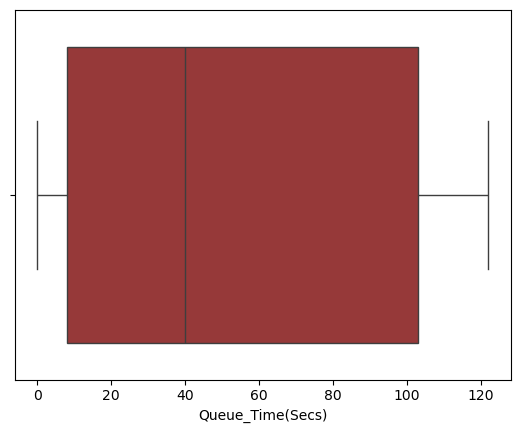

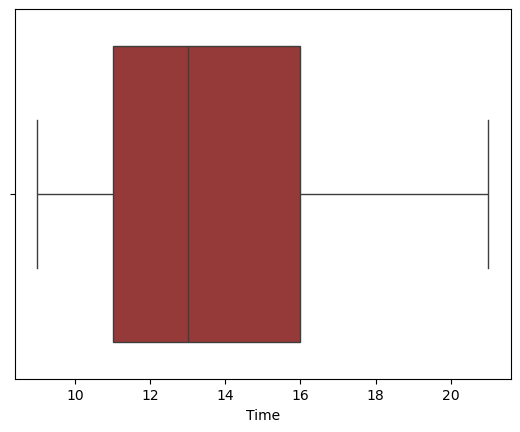

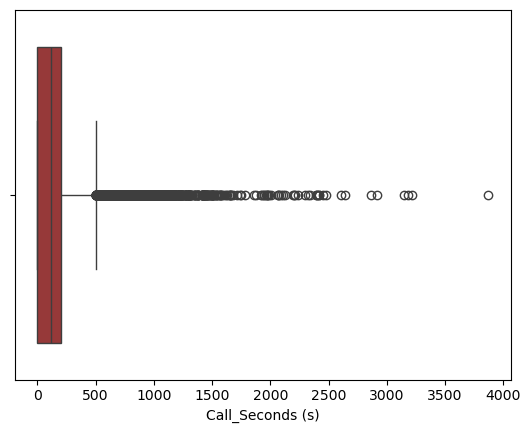

In [13]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data= df, x=i,color='brown')
    plt.show()

In [14]:
new_df = df[df['Call_Seconds (s)'] < 2000]  # keeping 2000 as threshold value
new_df.shape

(117959, 13)

In [15]:
# Assumption
number_of_days_in_a_month = 30
number_of_working_hour = 0.6 * 7.5
number_of_working_hour_in_seconds = int(number_of_working_hour * 3600)
number_of_days_in_a_month, number_of_working_hour, number_of_working_hour_in_seconds

(30, 4.5, 16200)

<h3>Task 1: What is the average duration of calls for each time bucket? </h3>

In [16]:
import datetime 
time_bucket = new_df.groupby("Time_Bucket")["Call_Seconds (s)"].mean()  # calculates mean of call_seconds for each time_bucket
time_bucket = time_bucket.sort_values(ascending=True).reset_index()  # sorts the mean of call_seconds in ascending order
average_time_by_agent = int(time_bucket['Call_Seconds (s)'].mean())  # returns the average time spent by an agent
time_bucket['Call_Seconds (s)'] = time_bucket['Call_Seconds (s)'].apply(lambda x: datetime.timedelta(seconds=x))  # converts the seconds into time
time_bucket

,Time_Bucket,Call_Seconds (s)
0,9_10,0 days 00:01:31.798060
1,10_11,0 days 00:01:36.899399
2,20_21,0 days 00:01:45.949137
3,11_12,0 days 00:01:56.650393
4,19_20,0 days 00:02:23.543498
5,12_13,0 days 00:02:24.530235
6,14_15,0 days 00:02:26.595037
7,13_14,0 days 00:02:28.293639
8,15_16,0 days 00:02:49.453860
9,18_19,0 days 00:02:53.492814


In [17]:
average_calls_per_day = int(number_of_working_hour_in_seconds / average_time_by_agent)  # returns the average calls per day for an agent
average_calls_per_hour = int(average_calls_per_day / number_of_working_hour)  # returns the average calls per hour for an agent
average_calls_per_day, average_calls_per_hour

(114, 25)

In [18]:
time_bucket['Average_Call_Duration'] = time_bucket['Call_Seconds (s)'].apply(lambda x: str(x).split(' ')[-1])  # returns only the time
time_bucket['Average_Call_Duration'] = time_bucket['Average_Call_Duration'].apply(lambda x: str(x).split('.')[0]) # removes milliseconds
time_bucket = time_bucket.drop('Call_Seconds (s)',axis=1)  # we drop seconds since we have time duration now
time_bucket

,Time_Bucket,Average_Call_Duration
0,9_10,00:01:31
1,10_11,00:01:36
2,20_21,00:01:45
3,11_12,00:01:56
4,19_20,00:02:23
5,12_13,00:02:24
6,14_15,00:02:26
7,13_14,00:02:28
8,15_16,00:02:49
9,18_19,00:02:53


In [19]:
plt.rcParams['figure.figsize'] = (12,6)  # adjusts the height and width

In [20]:
order = ["9_10","10_11","11_12","12_13","13_14","14_15","15_16","16_17","17_18","18_19","19_20","20_21"]  # explicitly specify time_bucket order
time_bucket['Time_Bucket'] = pd.Categorical(time_bucket['Time_Bucket'], categories=order)  # orders the time_bucket in ascending order

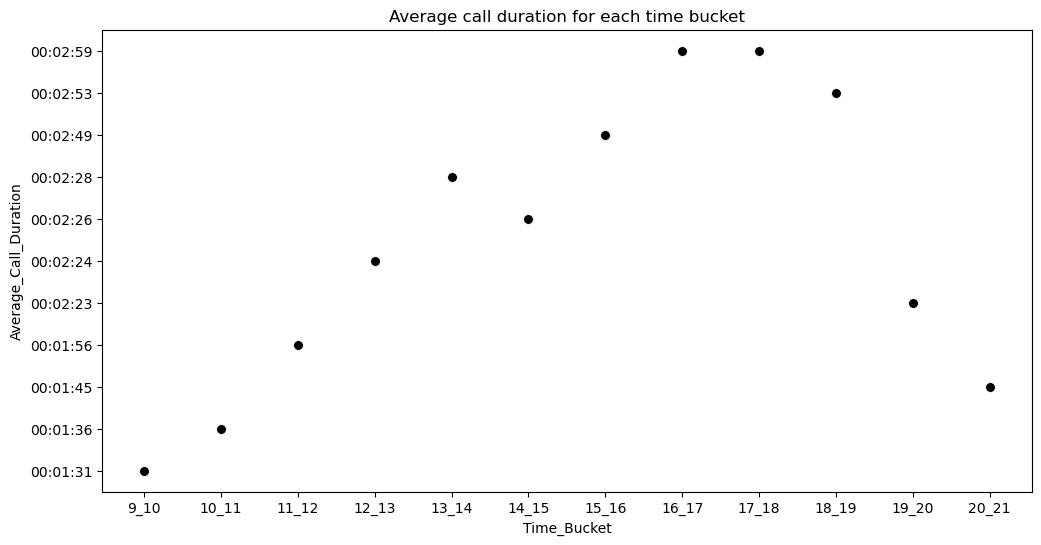

In [21]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)  # hides the FutureWarning
sns.scatterplot(data = time_bucket, x ='Time_Bucket', y ='Average_Call_Duration',color='black',s=50)
plt.gca().invert_yaxis()  # inverts the y axis
plt.title("Average call duration for each time bucket")
plt.show()

<h3>Task 2: What is the total number of calls received for each time bucket?</h3>

In [22]:
total_call = new_df.groupby('Time_Bucket').size().reset_index(name='Count')  # returns count of each time_bucket
total_call

,Time_Bucket,Count
0,10_11,13310
1,11_12,14625
2,12_13,12651
3,13_14,11555
4,14_15,10559
5,15_16,9157
6,16_17,8781
7,17_18,8533
8,18_19,7236
9,19_20,6460


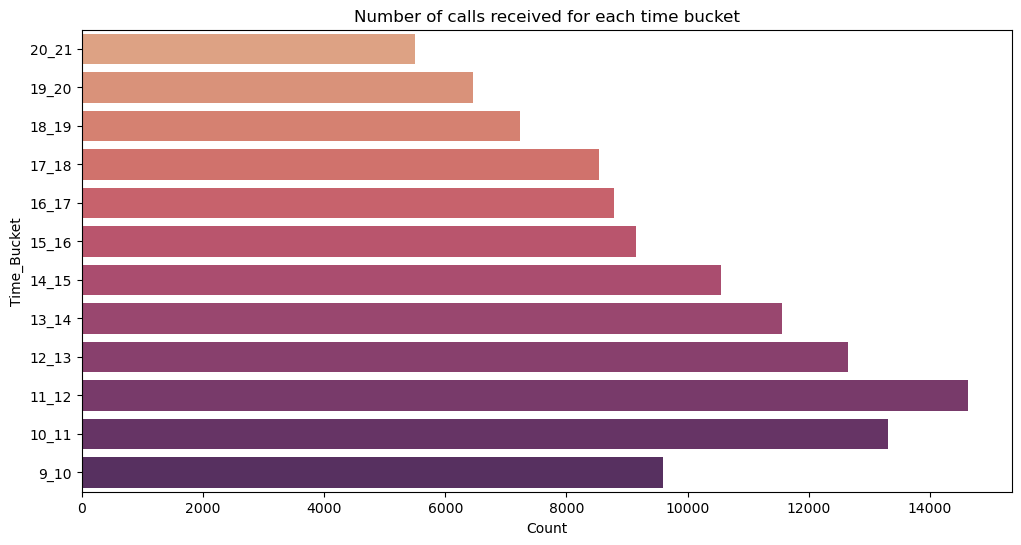

In [23]:
order_1 = ["20_21","19_20","18_19","17_18","16_17","15_16","14_15","13_14","12_13","11_12","10_11","9_10"]
sns.barplot(data=total_call,x='Count',y='Time_Bucket',palette='flare',order = order_1, orient='horizontal')
plt.title("Number of calls received for each time bucket")
plt.show()

<h3>Task 3: What is the minimum number of agents required in each time bucket to reduce the abandon rate to 10%?</h3>

In [24]:
total_abandoned_calls = len(new_df[new_df['Call_Status']=="abandon"]) # calculates the count of abandoned calls
total_calls = len(new_df['Call_Status'])  # returns the total number of calls
percentage_of_abandoned_calls = int(total_abandoned_calls / total_calls * 100)  # returns the percentage of abandoned calls
ten_percent_of_total_calls = int(total_calls / 10)  # calculates 10% of abandoned calls
reduction_ratio = round(ten_percent_of_total_calls / total_abandoned_calls,2) # calculates the reduction_ratio to get count of abandoned_calls (10%)
total_abandoned_calls, total_calls, percentage_of_abandoned_calls, ten_percent_of_total_calls, reduction_ratio

(34403, 117959, 29, 11795, 0.34)

In [25]:
abandoned_df = new_df[new_df['Call_Status']=="abandon"]  # creates a dataframe where call status is abandon
reduced_abandoned_rate = abandoned_df.groupby("Time_Bucket").size().reset_index(name="Count of Abandoned Calls")  
# calculates count of abandoned calls for each time_bucket 
reduced_abandoned_rate

,Time_Bucket,Count of Abandoned Calls
0,10_11,6911
1,11_12,6028
2,12_13,3073
3,13_14,2617
4,14_15,2475
5,15_16,1214
6,16_17,747
7,17_18,783
8,18_19,933
9,19_20,1848


In [26]:
reduced_abandoned_rate['Count of Abandoned Calls (10%)'] = (reduced_abandoned_rate['Count of Abandoned Calls'] * reduction_ratio).astype(int)
# calculates the count of abandoned calls (10%) for each time_bucket
reduced_abandoned_rate

,Time_Bucket,Count of Abandoned Calls,Count of Abandoned Calls (10%)
0,10_11,6911,2349
1,11_12,6028,2049
2,12_13,3073,1044
3,13_14,2617,889
4,14_15,2475,841
5,15_16,1214,412
6,16_17,747,253
7,17_18,783,266
8,18_19,933,317
9,19_20,1848,628


In [27]:
reduced_abandoned_rate['Manpower_needed'] = (reduced_abandoned_rate['Count of Abandoned Calls (10%)'] / average_calls_per_hour).astype(int)
# calculates the manpower required for each time_bucket to make rate of abandoned calls to 10%
reduced_abandoned_rate

,Time_Bucket,Count of Abandoned Calls,Count of Abandoned Calls (10%),Manpower_needed
0,10_11,6911,2349,93
1,11_12,6028,2049,81
2,12_13,3073,1044,41
3,13_14,2617,889,35
4,14_15,2475,841,33
5,15_16,1214,412,16
6,16_17,747,253,10
7,17_18,783,266,10
8,18_19,933,317,12
9,19_20,1848,628,25


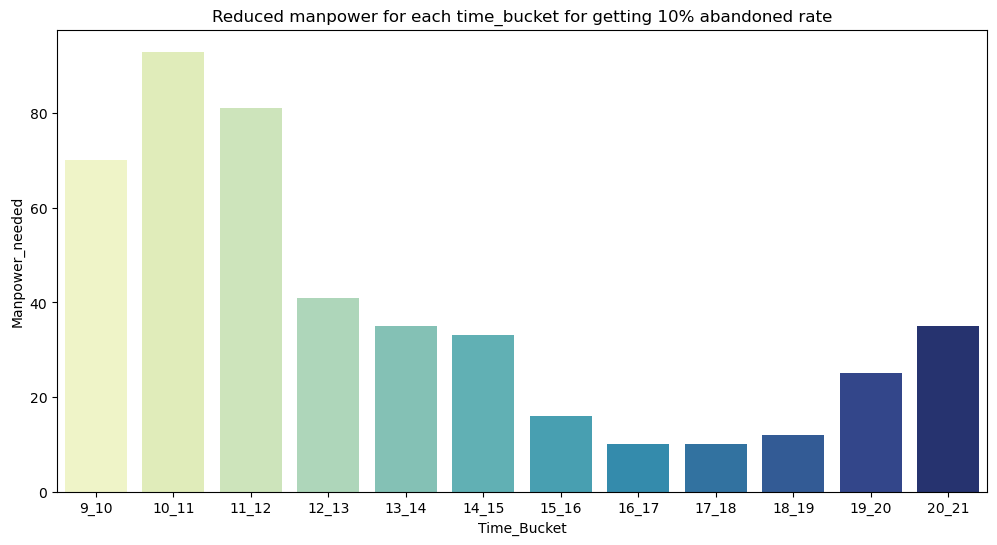

In [28]:
order = ["9_10","10_11","11_12","12_13","13_14","14_15","15_16","16_17","17_18","18_19","19_20","20_21"]
sns.barplot(data = reduced_abandoned_rate,x='Time_Bucket',y='Manpower_needed',order=order,palette='YlGnBu')
plt.title("Reduced manpower for each time_bucket for getting 10% abandoned rate")
plt.show()

<h3>Task 4: Propose a manpower plan for each time bucket throughout the day, keeping the maximum abandon rate at 10%.</h3>

In [29]:
total_answered_calls = total_calls - ten_percent_of_total_calls  # calculates the total answered calls while keeping max 10% abandoned rate
average_call_per_day = int(total_answered_calls/number_of_days_in_a_month)  # calculates the average number of call for a day
average_call_per_night = int(0.30 * average_call_per_day) # 30% of average_call_per_day
number_of_calls_in_night = 30
total_answered_calls, average_call_per_day, average_call_per_night 

(106164, 3538, 1061)

In [30]:
distribution = pd.DataFrame({  # creates a new dataframe
    '21_22' : [3],
    '22_23' : [3],
    '23_24' : [2],
    '12_1' : [2],
    '1_2' : [1],
    '2_3' : [1],
    '3_4' : [1],
    '4_5' : [1],
    '5_6' : [3],
    '6_7' : [4],
    '7_8' : [4],
    '8_9' : [5]
})
distribution_of_given_calls = pd.DataFrame({  
    'Time_Bucket' : distribution.columns,  
    'Distribution_of_calls' : distribution.iloc[0].values
})
distribution_of_given_calls

,Time_Bucket,Distribution_of_calls
0,21_22,3
1,22_23,3
2,23_24,2
3,12_1,2
4,1_2,1
5,2_3,1
6,3_4,1
7,4_5,1
8,5_6,3
9,6_7,4


In [31]:
distribution_of_given_calls['Percentage Distribution'] = distribution_of_given_calls['Distribution_of_calls'] / number_of_calls_in_night
# percentage distribution of calls
distribution_of_given_calls

,Time_Bucket,Distribution_of_calls,Percentage Distribution
0,21_22,3,0.100000
1,22_23,3,0.100000
2,23_24,2,0.066667
3,12_1,2,0.066667
4,1_2,1,0.033333
5,2_3,1,0.033333
6,3_4,1,0.033333
7,4_5,1,0.033333
8,5_6,3,0.100000
9,6_7,4,0.133333


In [32]:
distribution_of_given_calls['Distribution_of_calls_for_night'] = (average_call_per_night * distribution_of_given_calls['Percentage Distribution']).astype(int)
# distribution of calls for night for each time_bucket
distribution_of_given_calls

,Time_Bucket,Distribution_of_calls,Percentage Distribution,Distribution_of_calls_for_night
0,21_22,3,0.100000,106
1,22_23,3,0.100000,106
2,23_24,2,0.066667,70
3,12_1,2,0.066667,70
4,1_2,1,0.033333,35
5,2_3,1,0.033333,35
6,3_4,1,0.033333,35
7,4_5,1,0.033333,35
8,5_6,3,0.100000,106
9,6_7,4,0.133333,141


In [33]:
distribution_of_given_calls['Manpower_needed'] = (distribution_of_given_calls['Distribution_of_calls_for_night'] / average_calls_per_hour).astype(int)
# calculates the manpower required for each time_bucket in night
distribution_of_given_calls

,Time_Bucket,Distribution_of_calls,Percentage Distribution,Distribution_of_calls_for_night,Manpower_needed
0,21_22,3,0.100000,106,4
1,22_23,3,0.100000,106,4
2,23_24,2,0.066667,70,2
3,12_1,2,0.066667,70,2
4,1_2,1,0.033333,35,1
5,2_3,1,0.033333,35,1
6,3_4,1,0.033333,35,1
7,4_5,1,0.033333,35,1
8,5_6,3,0.100000,106,4
9,6_7,4,0.133333,141,5


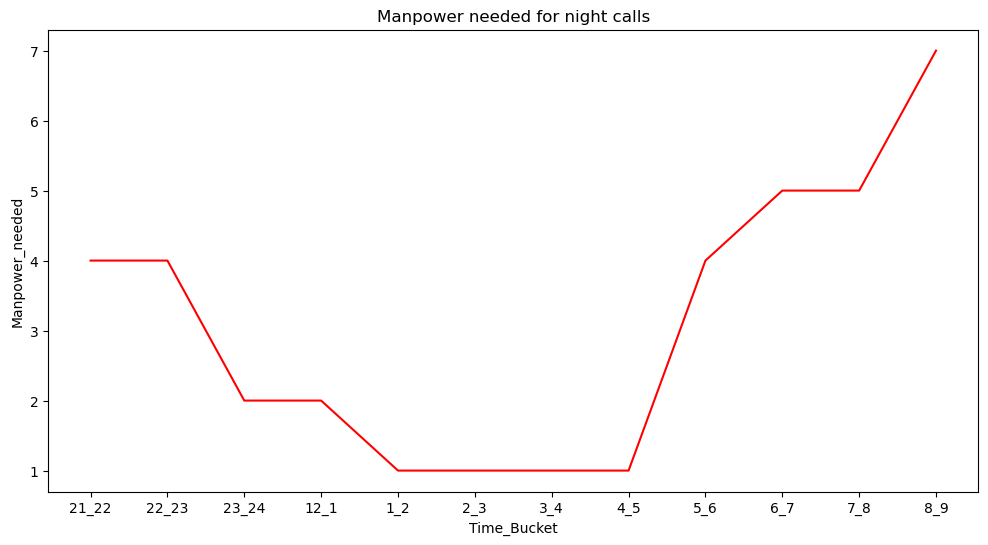

In [34]:
sns.lineplot(data = distribution_of_given_calls, x='Time_Bucket', y='Manpower_needed',color='red')
plt.title("Manpower needed for night calls")
plt.show()

In [35]:
# creating a dataframe for entire day time_bucket and manpower_needed
whole_day_time_bucket = order + distribution_of_given_calls['Time_Bucket'].tolist()  
whole_day_manpower = reduced_abandoned_rate['Manpower_needed'].tolist() + distribution_of_given_calls['Manpower_needed'].tolist()
whole_day_df = pd.DataFrame({
    'Time_Bucket' : whole_day_time_bucket,
    'Manpower_needed' : whole_day_manpower
})
whole_day_df

,Time_Bucket,Manpower_needed
0,9_10,93
1,10_11,81
2,11_12,41
3,12_13,35
4,13_14,33
5,14_15,16
6,15_16,10
7,16_17,10
8,17_18,12
9,18_19,25


In [36]:
plt.rcParams['figure.figsize'] = (20,8)

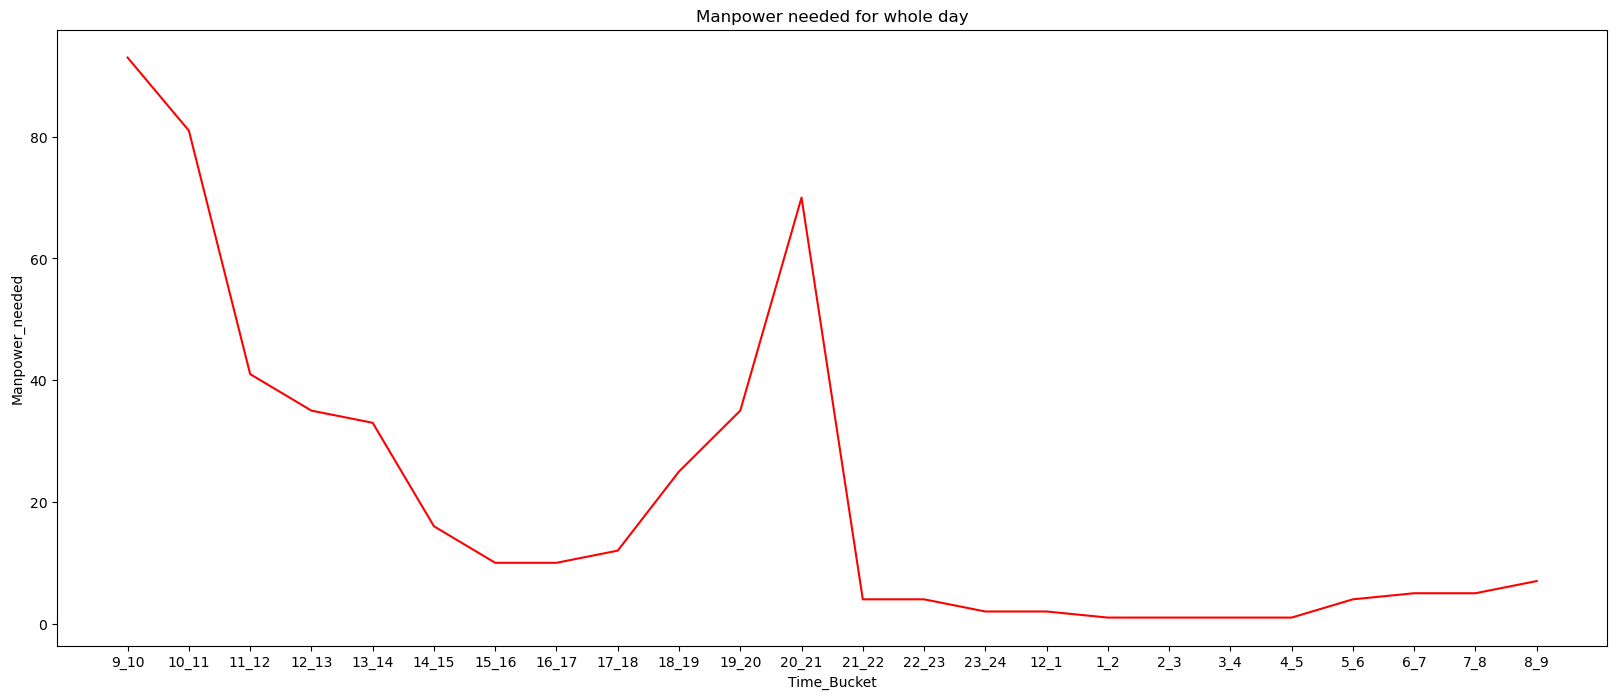

In [37]:
sns.lineplot(data = whole_day_df, x='Time_Bucket', y='Manpower_needed',color='red')
plt.title("Manpower needed for whole day")
plt.show()